<a href="https://colab.research.google.com/github/jweir136/Digits-ML/blob/master/Digits1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Tensorflow to Solve MNIST Digits Problem

The data can be downloaded [Here](https://www.kaggle.com/c/digit-recognizer/data).

## Importing Data and Required Libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

%matplotlib inline

In [0]:
train_df = pd.read_csv("train.csv")

In [0]:
train_imgs = train_df.drop(['label'], axis=1).values
train_labels = train_df['label'].values

## Spliting and Normalizing Data

In [0]:
trainX, testX, trainY, testY = train_test_split(train_imgs, train_labels, test_size=.2)

In [5]:
trainX = StandardScaler().fit_transform(trainX)
testX = StandardScaler().fit_transform(testX)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## Visualizing Data

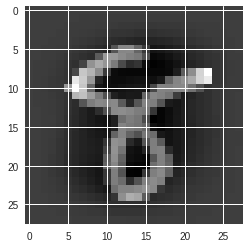

In [6]:
first_image = np.array(trainX[0], dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')

## Creating DNN

In [0]:
n_inputs = trainX.shape[1]
n_hidden1 = 1000
n_hidden2 = 500
n_hidden3 = 100
n_outputs = 10 # There are 10 different digits (0 to 9).

In [0]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs))
y = tf.placeholder(tf.int64, shape=(None))

In [9]:
with tf.name_scope("dnn"):
  hidden1 = tf.layers.dense(X, n_hidden1, tf.nn.elu)
  hidden2 = tf.layers.dense(hidden1, n_hidden2, tf.nn.elu)
  hidden3 = tf.layers.dense(hidden2, n_hidden3, tf.nn.elu)
  outputs = tf.layers.dense(hidden3, n_outputs)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.


In [0]:
with tf.name_scope("loss"):
  xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=outputs, labels=y)
  loss = tf.reduce_mean(xentropy)

In [0]:
with tf.name_scope("train"):
  train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [0]:
with tf.name_scope("eval"):
  correct = tf.nn.in_top_k(outputs, y, 1)
  accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [0]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

## Training DNN

In [14]:
with tf.Session() as sess:
  epochs = []
  train_scores = []
  test_scores = []
  init.run()
  for i in range(1, 41):
    sess.run(train_op, feed_dict={X:trainX, y:trainY})
    print(i, accuracy.eval(feed_dict={X:trainX, y:trainY}), accuracy.eval(feed_dict={X:testX, y:testY}))
  train_acc = accuracy.eval(feed_dict={X:trainX, y:trainY})
  test_acc = accuracy.eval(feed_dict={X:testX, y:testY})

1 0.61761904 0.60690475
2 0.7352679 0.72964287
3 0.78488094 0.77738094
4 0.813125 0.80464286
5 0.83017856 0.82166666
6 0.8421726 0.83416665
7 0.85074407 0.8445238
8 0.8579762 0.8517857
9 0.86443454 0.85821426
10 0.8696131 0.862381
11 0.87354165 0.86690474
12 0.8777083 0.87023807
13 0.8813988 0.8742857
14 0.88497025 0.8775
15 0.8877976 0.8802381
16 0.89074403 0.8819048
17 0.89306545 0.8844048
18 0.89488095 0.8863095
19 0.8968452 0.88785714
20 0.89839286 0.8902381
21 0.9 0.8919048
22 0.9014286 0.8933333
23 0.9030655 0.8945238
24 0.9044345 0.89535713
25 0.9057143 0.8972619
26 0.90708333 0.8978571
27 0.9084226 0.8982143
28 0.90949404 0.8995238
29 0.91059524 0.89988095
30 0.9114583 0.9004762
31 0.91270834 0.90178573
32 0.91377974 0.90261906
33 0.9144643 0.9033333
34 0.9153572 0.9052381
35 0.91622025 0.9059524
36 0.91699404 0.9065476
37 0.91785717 0.9071429
38 0.91872025 0.9078571
39 0.9191667 0.9090476
40 0.9195833 0.9103571


## Evaluating Model

In [15]:
train_acc, test_acc

(0.9195833, 0.9103571)

## Conclusion

From here, you can take the .ckpt files, and do whatever you see fit.  You can make more predictions, you can use it in a contest, you can use it in real life, etc.